# Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH_REF = Path('ChallengeRefGenomes')

# Data frame setup

## Read fasta files into df

In [4]:
# based on https://github.com/fastai/fastai_docs/blob/master/dev_course/dl2/08_data_block.ipynb
def get_seq_files(path, extension='.fasta'):
    path = Path(path)
    fs = [f for f in os.scandir(path) if (not str(f).startswith('.') and f.name.endswith(extension))]
    return fs

In [5]:
def get_seqs(path, extension='.fasta'):
    seq, lbs = [], []
    for f in get_seq_files(path, extension=extension):
        for rec in SeqIO.parse(f, 'fasta'):
            seq.append(str(rec.seq.upper())) # append sequence
            lbs.append(str(rec.name)) # append sequence name
    return seq, lbs

In [6]:
seq, lbs = get_seqs(PATH_REF)

In [7]:
len(seq), len(lbs)

(1694, 1694)

In [8]:
df = pd.DataFrame({'label': lbs, 'sequence': seq})#, columns=col_names)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 2 columns):
label       1694 non-null object
sequence    1694 non-null object
dtypes: object(2)
memory usage: 26.5+ KB


In [10]:
df.head()

,label,sequence
0,CR_443_Contig_0,ATCCAATTATTGGTAAAAGAAAATAAAAATTTTATAAGCGGCGTGC...
1,CR_494_Contig_0,AAACGTGGAGCACTTACTGGCTCGAAAGAAAGCGTGATCATCGCAT...
2,CR_494_Contig_1,ATTGACTGCTCATTTATGGGTCATGAAGAGTCTCTGATGTTGTTTT...
3,CR_494_Contig_2,AACTTGAAGCCGTCTTTACGGATTAGCGTTGTCACGCAGGCTTTGT...
4,CR_494_Contig_3,TGATTTCGCCCATAATATTGGCGTCAGCATGGTTATCGGCAATTAT...


In [11]:
# check for NaN values
assert df.isna().sum().sum() == 0

In [12]:
# save df as csv file
df.to_csv('ChallengeRefGenomes.csv', index=False)

## Test load df

In [4]:
df = pd.read_csv('ChallengeRefGenomes.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 2 columns):
label       1694 non-null object
sequence    1694 non-null object
dtypes: object(2)
memory usage: 26.5+ KB


In [6]:
df.head()

,label,sequence
0,CR_443_Contig_0,ATCCAATTATTGGTAAAAGAAAATAAAAATTTTATAAGCGGCGTGC...
1,CR_494_Contig_0,AAACGTGGAGCACTTACTGGCTCGAAAGAAAGCGTGATCATCGCAT...
2,CR_494_Contig_1,ATTGACTGCTCATTTATGGGTCATGAAGAGTCTCTGATGTTGTTTT...
3,CR_494_Contig_2,AACTTGAAGCCGTCTTTACGGATTAGCGTTGTCACGCAGGCTTTGT...
4,CR_494_Contig_3,TGATTTCGCCCATAATATTGGCGTCAGCATGGTTATCGGCAATTAT...


# EDA

## Calculate contig total base pair length and count

In [7]:
df_ext = pd.read_csv('ChallengeRefGenomes.csv')

In [8]:
# get only genome name
df_ext['species'] = df_ext['label'].apply(lambda x: x.split('_')[1])

In [10]:
df_ext['length'] = df_ext['sequence'].apply(lambda x: len(x))

In [149]:
df_ext.describe()

,length
count,1.694000e+03
mean,1.210679e+06
std,1.745196e+06
min,2.500000e+02
25%,1.895825e+04
50%,1.135795e+05
75%,2.261265e+06
max,8.934655e+06


In [150]:
df_ext.describe(include=['O'])

,label,sequence,species
count,1694,1694,1694
unique,1694,1692,517
top,CR_487_Contig_50,CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCG...,487
freq,1,2,71


In [110]:
df_ext.head()

,label,sequence,species,length
0,CR_443_Contig_0,ATCCAATTATTGGTAAAAGAAAATAAAAATTTTATAAGCGGCGTGC...,443,11477
1,CR_494_Contig_0,AAACGTGGAGCACTTACTGGCTCGAAAGAAAGCGTGATCATCGCAT...,494,19511
2,CR_494_Contig_1,ATTGACTGCTCATTTATGGGTCATGAAGAGTCTCTGATGTTGTTTT...,494,29108
3,CR_494_Contig_2,AACTTGAAGCCGTCTTTACGGATTAGCGTTGTCACGCAGGCTTTGT...,494,622989
4,CR_494_Contig_3,TGATTTCGCCCATAATATTGGCGTCAGCATGGTTATCGGCAATTAT...,494,3944186


## Contig lengths and counts

In [ ]:
# get the total contig length of the sequences per species
df_ext_species_length = pd.pivot_table(df_ext, values='length', index='species', aggfunc='sum').sort_values(by='length', ascending=False)

In [ ]:
# calculate the percentage of the contig length of the sequences per species in %
df_ext_species_length['length_percentage'] = df_ext_species_length['length']/df_ext_species_length['length'].sum()*100

In [58]:
#  add contig count
df_ext_species_length['contig_count'] = pd.pivot_table(df_ext, values='length', index='species', aggfunc='count').sort_values(by='length', ascending=False)

In [93]:
df_ext_species_length.head(10)

,length,length_percentage,contig_count
species,,,
195,35796027,1.745390,25
487,34011430,1.658374,71
475,33443056,1.630661,56
73,9009338,0.439289,7
319,8934655,0.435648,1
37,8890828,0.433511,5
398,8809615,0.429551,4
143,8613087,0.419968,5
428,8569715,0.417854,4


In [94]:
df_ext_species_length.tail(10)

,length,length_percentage,contig_count
species,,,
406,11276,0.000550,1
445,11256,0.000549,1
15,11142,0.000543,2
74,10772,0.000525,1
59,10771,0.000525,1
208,10771,0.000525,1
210,10709,0.000522,3
425,10493,0.000512,2
125,10368,0.000506,1


We have 517 different species and the speices with the highes contig lentgh percentage has only 1,75% of the total contig length percentage.

## Single contig length distribuiton

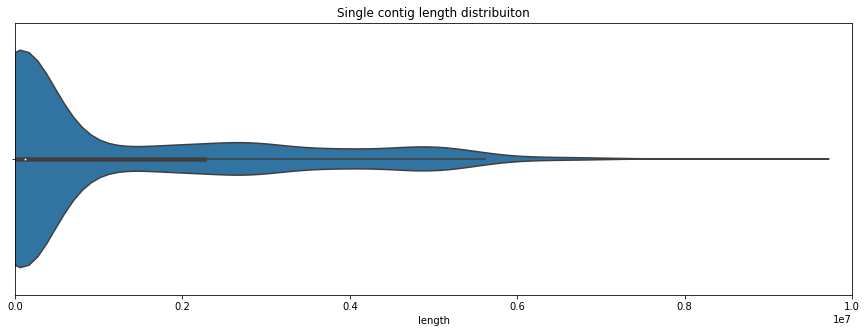

In [162]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Single contig length distribuiton')
ax.set_xlim(0, 1e7)
sns.violinplot(df_ext.length);

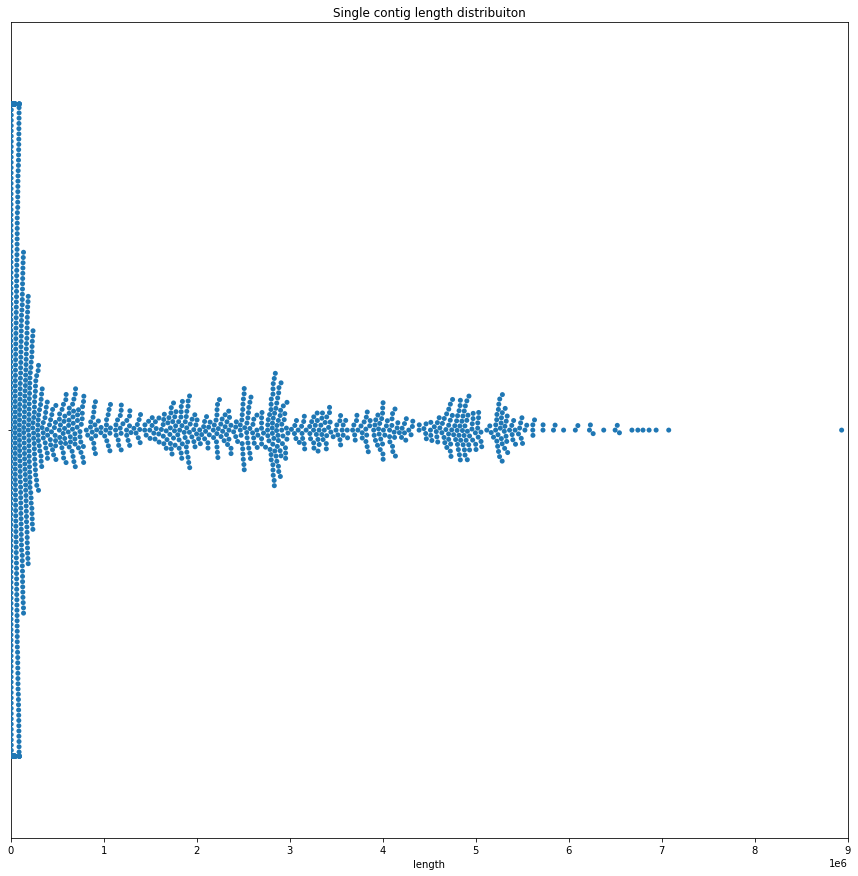

In [167]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Single contig length distribuiton')
ax.xaxis.get_major_formatter().set_powerlimits((0, 1))
ax.set_xlim(0, 9e6)
sns.swarmplot(df_ext.length);

## Figure total contig base pair length per species

In [37]:
# plot the total contig length pair sum of the sequences per species
#df_ext_species_length['length'].sort_values(ascending=True).plot.barh(title='Total contig base pair sum per species', figsize=(15,100), legend=False, grid=True);

In [141]:
# plot the total contig length pair percentage of the sequences per species
#df_ext_species_length['length_percentage'].sort_values(ascending=True).plot.barh(title='Total contig base pair length per species in percentage of total base pairs', figsize=(15,100), legend=False, grid=True);

## Figure total contig base pair length and contig count per species

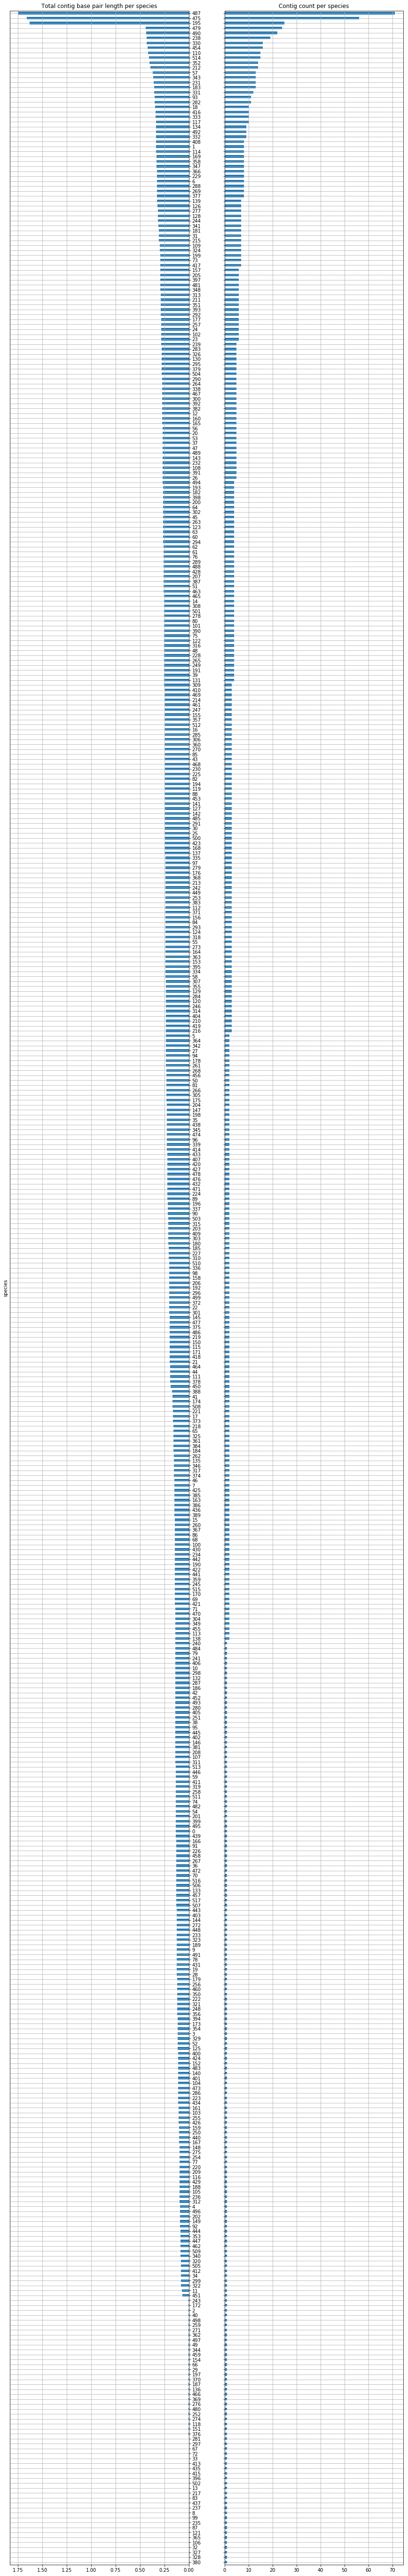

In [142]:
# based on https://stackoverflow.com/questions/44049132/python-pandas-plotting-two-barh-side-by-side
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,100))
ax.set_title('Total contig base pair length per species')
ax2.set_title('Contig count per species')
ax.invert_xaxis()
ax.yaxis.tick_right()
df_ext_species_length['length_percentage'].sort_values().plot.barh(ax=ax, legend=False, grid=True)
df_ext_species_length['contig_count'].sort_values().plot.barh(ax=ax2, legend=False, grid=True)
plt.show();

The higher the contig sequence count the higher the total contig sequence base pair sum.

In [ ]:
# https://github.com/nspies/genomeview ?